       ID Customer_ID    Month             Name  Age          SSN Occupation  \
0  0x1602   CUS_0xd40  January    Aaron Maashoh   23  821-00-0265  Scientist   
1  0x1605   CUS_0xd40    April    Aaron Maashoh   23  821-00-0265  Scientist   
2  0x1606   CUS_0xd40      May    Aaron Maashoh   23  821-00-0265  Scientist   
3  0x1607   CUS_0xd40     June    Aaron Maashoh   23  821-00-0265  Scientist   
4  0x160e  CUS_0x21b1  January  Rick Rothackerj  28_  004-07-5839    _______   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12            1824.843333                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      34847.84            3037.986667                  2  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     C

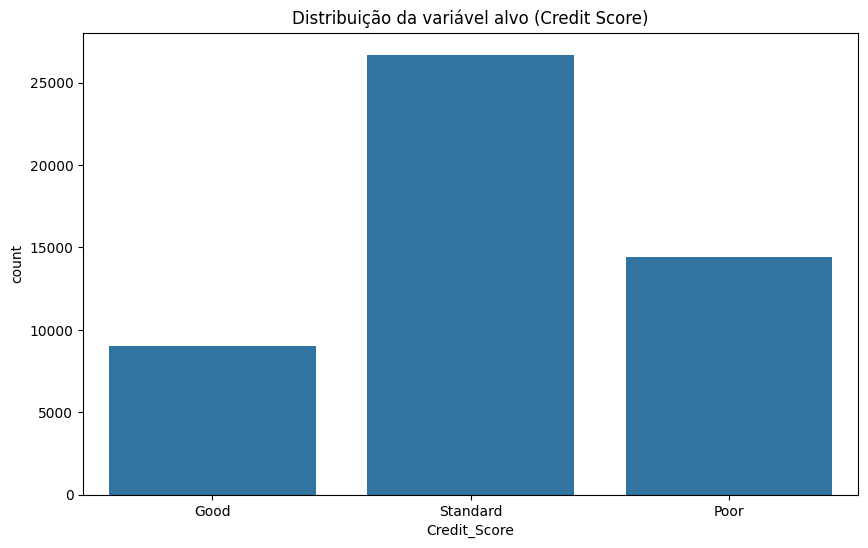

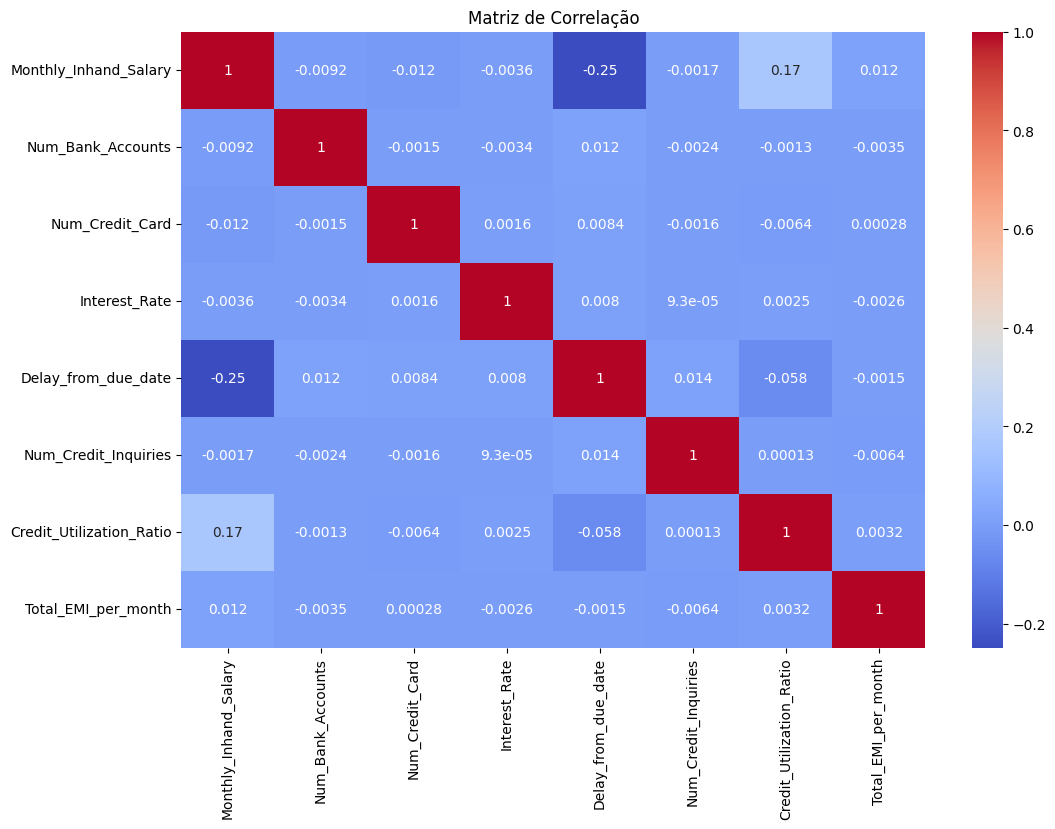

In [1]:
# Notebook Completo de Classificação Supervisionada usando Random Forest

# Importação de Bibliotecas
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Carregar uma amostra dos dados (50% dos dados)
train_df = pd.read_csv('train.csv', skiprows=lambda i: i > 0 and random.random() > 0.5)
test_df = pd.read_csv('test.csv', skiprows=lambda i: i > 0 and random.random() > 0.5)

# Exploração inicial
print(train_df.head())
print(train_df.info())
print(train_df.describe())

# Análise Exploratória (EDA)
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_Score', data=train_df)
plt.title('Distribuição da variável alvo (Credit Score)')
plt.show()

# Correlação
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


# Pré-processamento

In [2]:

# Preenchendo valores ausentes com a média
train_df.fillna(train_df.mean(numeric_only=True), inplace=True)
test_df.fillna(test_df.mean(numeric_only=True), inplace=True)

# Identificando variáveis categóricas corretamente
categorical_features = train_df.select_dtypes(include=['object']).columns

# Garantindo que a variável alvo não esteja incluída
categorical_features = [col for col in categorical_features if col != 'Credit_Score']

# Codificação das variáveis categóricas
train_df = pd.get_dummies(train_df, columns=categorical_features, drop_first=True, dtype='uint8')
test_df = pd.get_dummies(test_df, columns=categorical_features, drop_first=True, dtype='uint8')

print(train_df.shape)
print(test_df.shape)
print(train_df.memory_usage(deep=True).sum() / (1024 ** 2), "MB")

# Alinhando colunas do conjunto de teste com o conjunto de treino
test_df = test_df.reindex(columns=train_df.drop('Credit_Score', axis=1).columns, fill_value=0)

# Separando Features e Alvo
X = train_df.drop('Credit_Score', axis=1)
y = train_df['Credit_Score']

# Reduzindo número de colunas antes de dividir
top_columns = X.std().sort_values(ascending=False).head(300).index
X_reduced = X[top_columns]



(50131, 221122)
(24937, 140687)
10577.191469192505 MB


# Treinando o modelo

Acurácia: 0.64
Relatório de Classificação:
              precision    recall  f1-score   support

        Good       0.57      0.48      0.52      1777
        Poor       0.63      0.59      0.61      2883
    Standard       0.66      0.72      0.69      5367

    accuracy                           0.64     10027
   macro avg       0.62      0.60      0.61     10027
weighted avg       0.64      0.64      0.64     10027



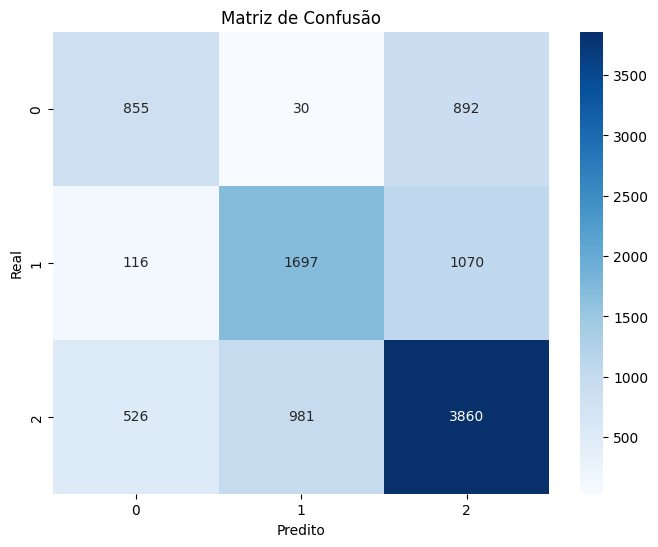

In [3]:

# Dividir os dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Treinamento do modelo Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Avaliação do modelo
predictions = model.predict(X_val)

print(f'Acurácia: {accuracy_score(y_val, predictions):.2f}')
print('Relatório de Classificação:')
print(classification_report(y_val, predictions))

# Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val, predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()